# Exploratory Analysis of Climate Data

Exploratory Data Analysis (EDA for short) refers to the process of discovering patterns and relationships within a dataset. It is about making sense of the data at hand and getting to know it before modeling or analysis. It is an important step prior to model building and can help us formulate further questions and areas for investigation. Within this project we are going work with the `training_data.csv` and `test_data.csv` provided by partners of [WiDS Datathon 2023](https://www.kaggle.com/competitions/widsdatathon2023/data).

The goals of EDA are:

- Uncover the data structure and determine how it is coded;
- Inspect and “get to know” the data by summarizing and visualizing it;
- Detect outliers, missing data, and other anomalies and decide how/whether to address these issues;
- Find new avenues for analysis and further research;
- Prepare for model building or analysis, including the following:
    - Check assumptions;
    - Select features;
    - Choose an appropriate method.


As per the publisher WiDS Datathon Overview:

"The WiDS Datathon 2023 focuses on a prediction task involving forecasting sub-seasonal temperatures (temperatures over a two-week period, in our case) within the United States. We are using a pre-prepared dataset consisting of weather and climate information for a number of US locations, for a number of start dates for the two-week observation, as well as the forecasted temperature and precipitation from a number of weather forecast models (we will reveal the source of our dataset after the competition closes). Each row in the corresponds to a single location and a single start date for the two-week period. Your task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.

You are provided with two datasets:

`train_data.csv`: the training dataset, where `contest-tmp2m-14d__tmp2m`, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided `test_data.csv`: the test dataset, where we withhold the true value of `contest-tmp2m-14d__tmp2m` for each row.

Target:

`contest-tmp2m-14d__tmp2m`: the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, computed as (measured max temperature + measured mini temperature) / 2".

With all tactic and strategic goals set let's start by importing some libraries and loading CSV into a DataFrame for inspection and gaining familiarity with the data.

## Data Inspection

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports for visualisation
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Let's see first 5 rows of the training and testing datasets.

In [2]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv('datasets/train_data.csv')
train_data.head(5)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [3]:
test_data = pd.read_csv('datasets/test_data.csv')
test_data.head(5)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

What about the size of a table at hand?

In [4]:
print(train_data.shape, test_data.shape)

(375734, 246) (31354, 245)


It is a fairly big dataset with `246` columns and `375734` rows in training set and `245` columns and `31354` rows in testing. Let's get a short technical overview of the datasets.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 58.6+ MB


Result: 
- The majority of the values have data type `float` which is a floating point number. We can notice that some of them are temperature data, some - predictions from other models and the rest are presumably wind speed values. 
- 2 of the columns contain data with the type `object`. One of them is visible from the start, it is a `startdate` and it contains a measurement beginning date. The other one we can find out using the function below.
- The dataset takes a lot of memory, so we won't be able to upload it to GitHub.

In [7]:
def check_dtype(dataset, dtype, num_values):
    l = []
    for x in dataset.columns:
        if dataset[x].dtype == dtype:
            l.append(dataset[x][:num_values])
    return l
        
check_dtype(train_data, 'object',3)

[0    9/1/14
 1    9/2/14
 2    9/3/14
 Name: startdate, dtype: object,
 0    BSh
 1    BSh
 2    BSh
 Name: climateregions__climateregion, dtype: object]

In [8]:
check_dtype(test_data, 'object',3)

[0    11/1/22
 1    11/2/22
 2    11/3/22
 Name: startdate, dtype: object,
 0    BSh
 1    BSh
 2    BSh
 Name: climateregions__climateregion, dtype: object]

Result: Besides `startdate`, the `object` data type has column `climateregions__climateregion`. Let's check short statistic for this value.

In [9]:
train_data.climateregions__climateregion.describe()

count     375734
unique        15
top          BSk
freq      139621
Name: climateregions__climateregion, dtype: object

Result: We can see that there are apparently no `NaN`s within this column, there are 15 unique values and the most frequently used (139621 times) is `BSk`. 

Let's proceed to the columns with the `int64` data type. There were 4 of them, let's check how they look and what are they.

In [10]:
check_dtype(train_data, 'int64', 3)

[0    0
 1    1
 2    2
 Name: index, dtype: int64,
 0    4
 1    4
 2    4
 Name: mjo1d__phase, dtype: int64,
 0    56
 1    56
 2    56
 Name: mei__meirank, dtype: int64,
 0    4
 1    4
 2    4
 Name: mei__nip, dtype: int64]

In [11]:
check_dtype(test_data, 'int64', 3)

[0    375734
 1    375735
 2    375736
 Name: index, dtype: int64,
 0    200
 1    200
 2    200
 Name: elevation__elevation, dtype: int64]

In [12]:
train_data.elevation__elevation.dtype

dtype('float64')

In [13]:
test_data.mjo1d__phase.dtype, test_data.mei__meirank.dtype, test_data.mei__nip.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

Result: seems like only `index` column has integers within itself in both datasets, other columns change their data types from `float64` to `int64`, which is fine for now.

Since we have a time series problem, let's change `startdate` to `datetime` format for easier handling.

In [14]:
train_data.startdate = pd.to_datetime(train_data.startdate)
test_data.startdate = pd.to_datetime(test_data.startdate)

train_data.startdate.dtype, test_data.startdate.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

### Handling Missing Values

What about `NaN` values, how many of them we have in each column? Let's filter out only the columns which consist at least one `NaN` value.

In [15]:
def with_nans(dataset):
    
    with_nan = dataset.isna().sum()
    if with_nan[with_nan > 0].empty:
        print('No NaN values found.')
    else:
        return with_nan[with_nan > 0]

# Check training set for NaNs
with_nans(train_data)

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

In [16]:
# Check testing set for NaNs
with_nans(test_data)

No NaN values found.


Result: only training set contains `NaN`s, so let's see where exactly do they come across.

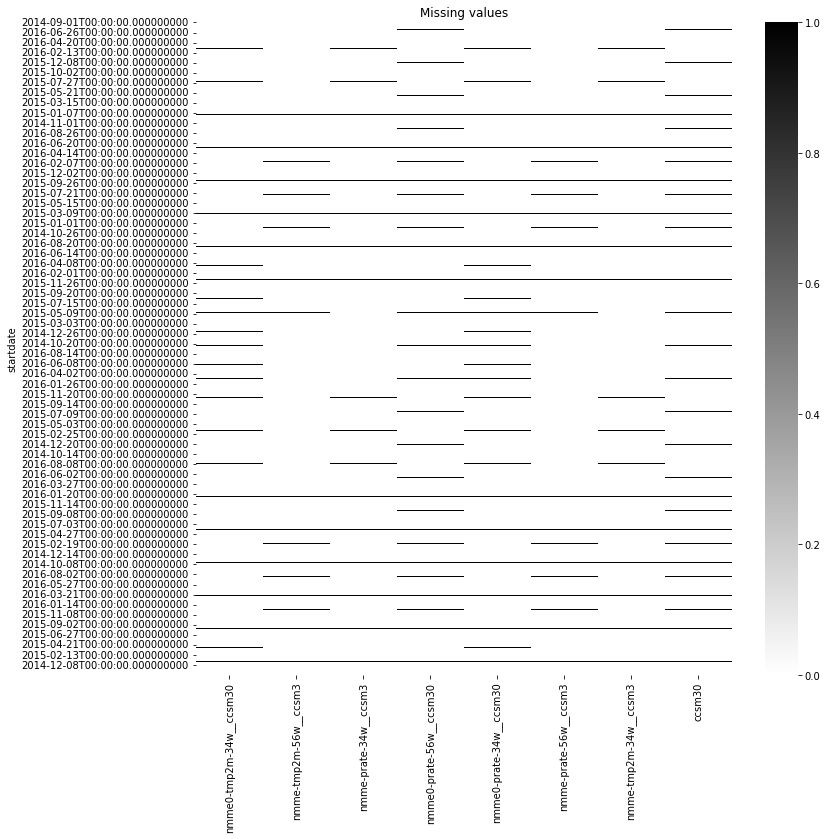

In [17]:
cols_with_missing = list(train_data.isnull().sum(axis=0)[train_data.isnull().sum(axis=0) > 0].index)

fig, ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(train_data.set_index(['startdate'])[cols_with_missing].isnull(), cmap='binary')
ax.set_title('Missing values')
plt.show()

According to the data description, provided by organisators columns with prefixes `nmme` and `ccsm` are results gotten from another models. Some of these columns contain quite a great amount of `NaN`s within them, considering that we are dealing with time series data we can assume that a current value will be very close to the previous and the next one, so we are going to replace the `NaN`s with the values that stand right before each one of them. Means in the case of time-series data won't be of much help, because they change the values too drastically from one date to another.

In [18]:
train_data = train_data.ffill()
# Check is any NaNs are left
with_nans(train_data)

No NaN values found.


### Start Date
Now with `NaN`s out of the way let's check what we have in `startdate` column. 

In [19]:
train_data.sort_values('startdate').startdate.head(3), train_data.sort_values('startdate').startdate.tail(3)

(0        2014-09-01
 290938   2014-09-01
 35819    2014-09-01
 Name: startdate, dtype: datetime64[ns],
 256580   2016-08-31
 187135   2016-08-31
 375733   2016-08-31
 Name: startdate, dtype: datetime64[ns])

In [20]:
test_data.sort_values('startdate').startdate.head(3), test_data.sort_values('startdate').startdate.tail(3)

(0       2022-11-01
 28365   2022-11-01
 19093   2022-11-01
 Name: startdate, dtype: datetime64[ns],
 21044   2022-12-31
 20251   2022-12-31
 31353   2022-12-31
 Name: startdate, dtype: datetime64[ns])

In [21]:
len(train_data.startdate.unique()), len(test_data.startdate.unique())

(731, 61)

Result: 
- Looks like training set contains 2 full years of info, starting from September 2014 and ending in August 2016. 
- On the other hand, training data starts in November 2022 and ends in December of the same year.

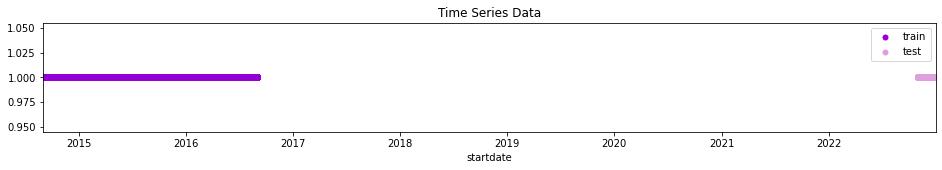

In [22]:
fig, ax = plt.subplots(1,1, figsize=(16,2))
ax.set_title('Time Series Data')
sns.scatterplot(data = train_data, x = 'startdate', y = 1, linewidth=0, label='train', color='darkviolet')
sns.scatterplot(data = test_data, x = 'startdate', y = 1, linewidth=0, label='test', color='plum')
ax.set_xlim([train_data['startdate'].iloc[0], test_data['startdate'].iloc[-1]])
plt.show()

This situation can cause us problems during model validation. One issue is that climate change was active during all these years and the temperatures were rising, so the difference might be quite notable, making validation set values a poorly achievable goal. The other issue is validation set takes into account only 2 months with quite low temperatures. Let's compare statistics of both datasets to check how they might differ.  

## Summarization and Comparison

In [23]:
train_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-20

In [24]:
test_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8

Result: In a table format these stats look quite overwhelming, so let's plot them. 

### Temperatures Comparison

We are going to display temperature predictions to see how they evolved. The values are contained within columns marked with `tmp2m` code. We are going to take only November and December 2015 from training and 2022 from testing sets to make comparison purer. 

In [25]:
def calc_stats(metric):
    
    slice_train = train_data[(train_data['startdate'] > '2015-11-01') & (train_data['startdate'] < '2015-12-31')]

    train_mean = slice_train.loc[:, slice_train.columns.str.contains(metric)].mean()
    test_mean = test_data.loc[:, test_data.columns.str.contains(metric)].mean()

    train_max = slice_train.loc[:, slice_train.columns.str.contains(metric)].max()
    test_max = test_data.loc[:, test_data.columns.str.contains(metric)].max()

    train_min = slice_train.loc[:, slice_train.columns.str.contains(metric)].min()
    test_min = test_data.loc[:, test_data.columns.str.contains(metric)].min()
    
    return train_mean, test_mean, train_max, test_max, train_min, test_min

train_mean_t, test_mean_t, train_max_t, test_max_t, train_min_t, test_min_t = calc_stats(metric='tmp2m')

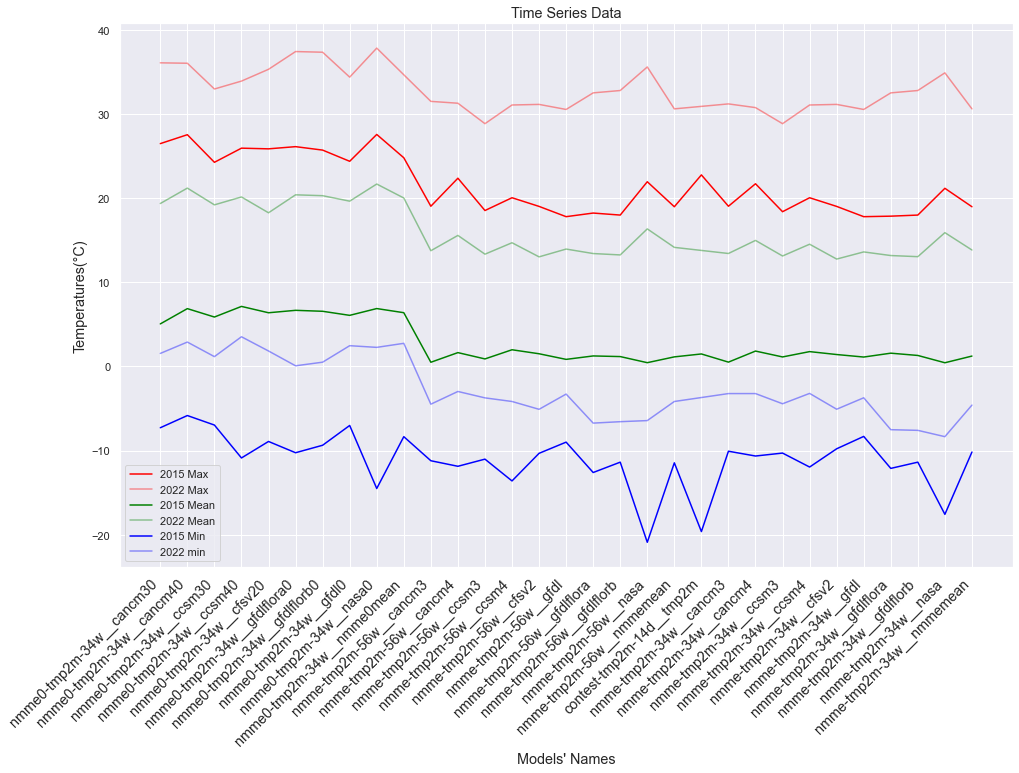

In [26]:
# Apply darkgrid to all plots 
sns.set(style='darkgrid')

def compare_stats(train_mean, test_mean, train_max, test_max, train_min, test_min, mean_color, max_color, min_color, ylabel):

    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.lineplot(data = train_max, color=max_color, label='2015 Max')
    sns.lineplot(data = test_max, color=max_color,  alpha=0.4, label='2022 Max')
    sns.lineplot(data = train_mean, color=mean_color, label='2015 Mean')
    sns.lineplot(data = test_mean, color=mean_color, alpha=0.4, label='2022 Mean')
    sns.lineplot(data = train_min, color=min_color, label='2015 Min')
    sns.lineplot(data = test_min, color=min_color,  alpha=0.4, label='2022 min')

    
    ax.set_xticklabels(train_min.index,
    rotation=45, 
    horizontalalignment='right', 
    fontsize = 'large')


    ax.set_title('Time Series Data', fontsize = 'large')
    ax.set_ylabel(ylabel = ylabel, fontsize = 'large')
    ax.set_xlabel('Models\' Names', fontsize = 'large')

    return plt.show()

compare_stats(
    train_mean_t, test_mean_t, train_max_t, test_max_t, train_min_t, test_min_t, 
    mean_color='green', 
    max_color='red', 
    min_color='blue', 
    ylabel='Temperatures(°C)')

Note: `34w` is the 3d and 4th week from the `startdate`, `56w` is the 5th and 6th respectively. At the end of the line is the name of a physical model.

Result:  all models' temperature predictions for all statistics and time periods have risen, most likely due to the climate change. 

### Precipitation Comparison

Let's see what we will get from precipitation predictors. Those contain `prate` code within their names.

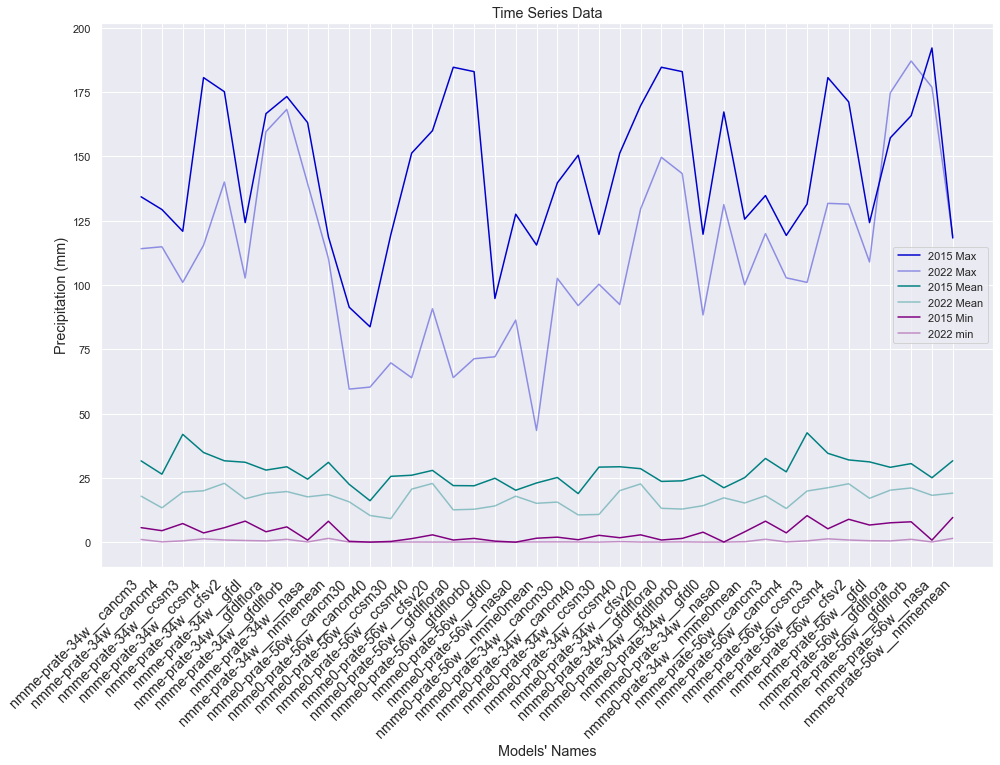

In [27]:
train_mean_p, test_mean_p, train_max_p, test_max_p, train_min_p, test_min_p = calc_stats(metric='prate')

compare_stats(
    train_mean_p, test_mean_p, train_max_p, test_max_p, train_min_p, test_min_p, 
    mean_color='Teal', 
    max_color='MediumBlue', 
    min_color='Purple', 
    ylabel='Precipitation (mm)')

Note: `34w` is the 3d and 4th week from the `startdate`, `56w` is the 5th and 6th respectively. At the end of the line is the name of a physical model.

Result: Precipitation has decreased in 2022 statistics, comparing to 2015, but not drastically and not for all models and time periods.

### Climate Region

We have categorical variable `regions`, which seems to inform us about the type of climate this region has. Let's count data points by region and add definitions, so those abbreviations would finally make sense to us. 

In [28]:
from mapping import map_to_def

regions_train = train_data.climateregions__climateregion.value_counts().to_frame('Count')
regions_train['Percentage'] = regions_train['Count'] / regions_train['Count'].sum()
regions_train = map_to_def(regions_train).reset_index().rename(columns={'index':'Name'})
pd.set_option('display.max_colwidth', None)
regions_train

,Name,Count,Percentage,Definition
0,BSk,139621,0.371595,Cold semi-arid climate
1,Dfb,52632,0.140078,Warm-summer humid continental climate
2,Cfa,51901,0.138132,Humid subtropical climate
3,Csb,40936,0.108949,Warm-summer Mediterranean climate
4,Dfa,22661,0.060311,Hot-summer humid continental climate
5,BWk,13889,0.036965,Cold desert climate
6,Dfc,12427,0.033074,Subarctic climate
7,BWh,9503,0.025292,Hot desert climate
8,Csa,9503,0.025292,Hot-summer Mediterranean climate
9,Dsb,8041,0.021401,Mediterranean-influenced warm-summer humid continental climate


What do we have in the test dataset? 

In [29]:
regions_test = test_data.climateregions__climateregion.value_counts().to_frame('Count')
regions_test['Percentage'] = regions_test['Count'] / regions_test['Count'].sum()
regions_test = map_to_def(regions_test).reset_index().rename(columns={'index':'Name'})
pd.set_option('display.max_colwidth', None)
regions_test

,Name,Count,Percentage,Definition
0,BSk,11651,0.371595,Cold semi-arid climate
1,Dfb,4392,0.140078,Warm-summer humid continental climate
2,Cfa,4331,0.138132,Humid subtropical climate
3,Csb,3416,0.108949,Warm-summer Mediterranean climate
4,Dfa,1891,0.060311,Hot-summer humid continental climate
5,BWk,1159,0.036965,Cold desert climate
6,Dfc,1037,0.033074,Subarctic climate
7,BWh,793,0.025292,Hot desert climate
8,Csa,793,0.025292,Hot-summer Mediterranean climate
9,Dsb,671,0.021401,Mediterranean-influenced warm-summer humid continental climate


In [30]:
print('Is the column "Name" the same for training and testing sets?', regions_train.Name.equals(regions_test.Name))
print('What about the column "Percentage"?', regions_train.Percentage.equals(regions_test.Percentage)) 
print('Column "Count"?', regions_train['Count'].equals(regions_test['Count']))

Is the column "Name" the same for training and testing sets? True
What about the column "Percentage"? True
Column "Count"? False


Result: 
- Number of data points is different, but percentages and devision by region is exactly the same for both datasets. 
- Also, the number of data points seems to be increasing in even batches from region to region: by 731 for training and 61 for testing sets.
 
We can put the count info on a plot for the ease of comprehension.

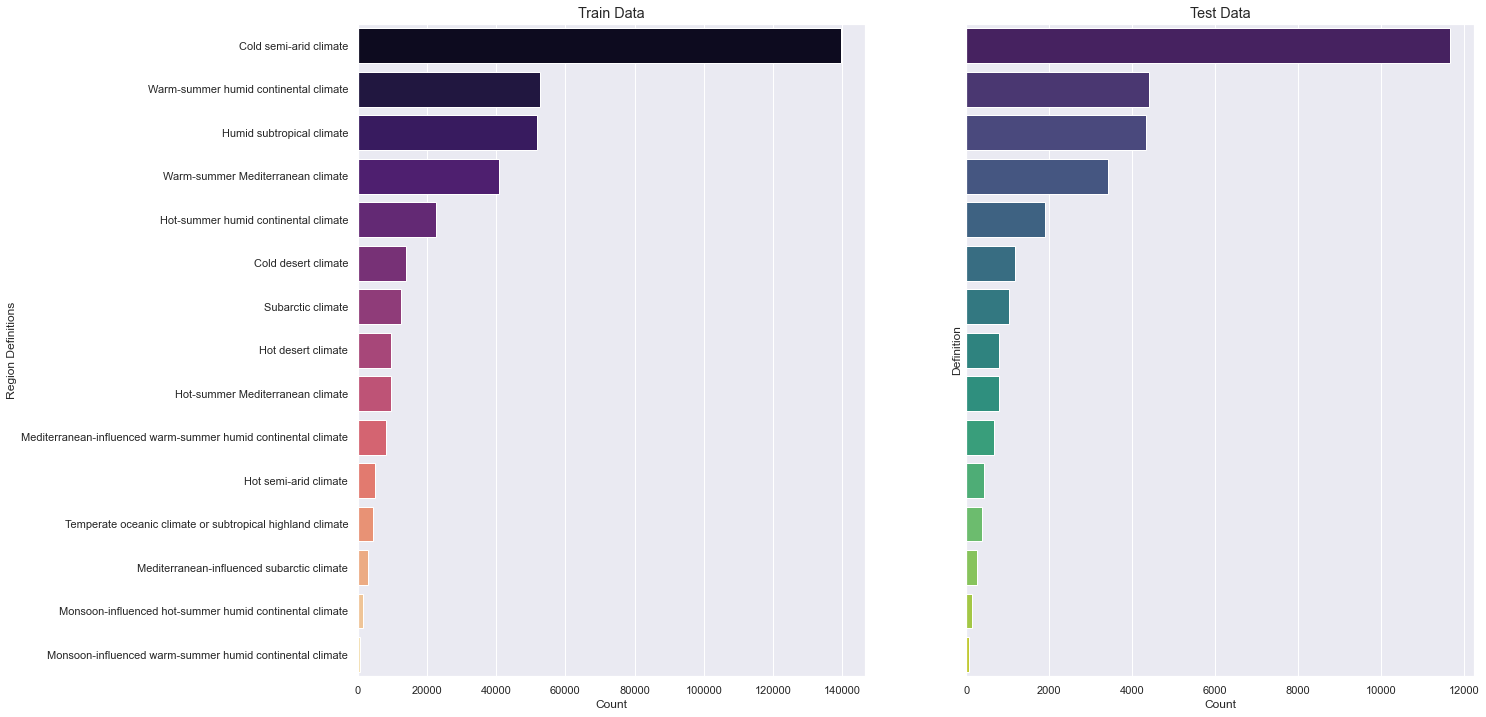

In [31]:
# Set figure size
fig, ax = plt.subplots(1,2, figsize=(20,12))
# Draw barplot
sns.barplot(data=regions_train, x="Count", y="Definition", palette='magma', ax=ax[0])
sns.barplot(data=regions_test, x="Count", y="Definition", palette='viridis', ax=ax[1])

# Add descriptions
ax[0].set_title('Train Data', fontsize = 'large')
ax[1].set_title('Test Data', fontsize = 'large')

ax[0].set_ylabel('Region Definitions')
ax[1].set_yticks([])

# Display plot
plt.show()

Result:
- Data points of cold semi-arid climate are dominant in this dataset - 37%. 

Note: a semi-arid climate, a semi-desert climate, or steppe climate is a dry climate sub-type. It is located on regions that receive precipitation below potential evapotranspiration, but not as low as a desert climate. 

- On the second and third place are Warm-summer humid continental and Humid subtropical climates, which take almost 14% of data points each. 

Data points of each region are located on a certain latitude and longitude, let's see how many of them are there. 

In [32]:
dp_by_region_train = train_data.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame('data_ponts_count').reset_index(drop=False)
dp_by_region_train

,climateregions__climateregion,lat,lon,data_ponts_count
0,BSh,0.000000,0.833333,731
1,BSh,0.136364,0.733333,731
2,BSh,0.136364,0.766667,731
3,BSh,0.181818,0.733333,731
4,BSh,0.181818,0.766667,731
...,...,...,...,...
509,Dsc,0.954545,0.100000,731
510,Dsc,1.000000,0.100000,731
511,Dwa,0.727273,0.733333,731
512,Dwa,0.727273,0.766667,731


Result: there are 731 data point within each `latitude-longitude-region` combination. Are there any other values besides 731 within this table? And how many such combinations we have? 

In [33]:
dp_by_region_train.data_ponts_count.describe()

count    514.0
mean     731.0
std        0.0
min      731.0
25%      731.0
50%      731.0
75%      731.0
max      731.0
Name: data_ponts_count, dtype: float64

Result: 
- We have 514 latitude-longitude-region combinations or, in other words, there are 514 unique locations. That basically means that each region in a training dataset contains batches of data points, 731 data points in each batch, which was visible from the table a bit earlier.

Let's do the same for testing set.

In [34]:
dp_by_region_test = test_data.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame('data_ponts_count').reset_index(drop=False)
dp_by_region_test

,climateregions__climateregion,lat,lon,data_ponts_count
0,BSh,0.000000,0.833333,61
1,BSh,0.136364,0.733333,61
2,BSh,0.136364,0.766667,61
3,BSh,0.181818,0.733333,61
4,BSh,0.181818,0.766667,61
...,...,...,...,...
509,Dsc,0.954545,0.100000,61
510,Dsc,1.000000,0.100000,61
511,Dwa,0.727273,0.733333,61
512,Dwa,0.727273,0.766667,61


In [35]:
dp_by_region_test.data_ponts_count.describe()

count    514.0
mean      61.0
std        0.0
min       61.0
25%       61.0
50%       61.0
75%       61.0
max       61.0
Name: data_ponts_count, dtype: float64

Result: 
- We have presumably the same 514 latitude-longitude-region combinations.
- But each location contains 61 data points within it. 

Let's put unique locations on the plot to understand how it might look.

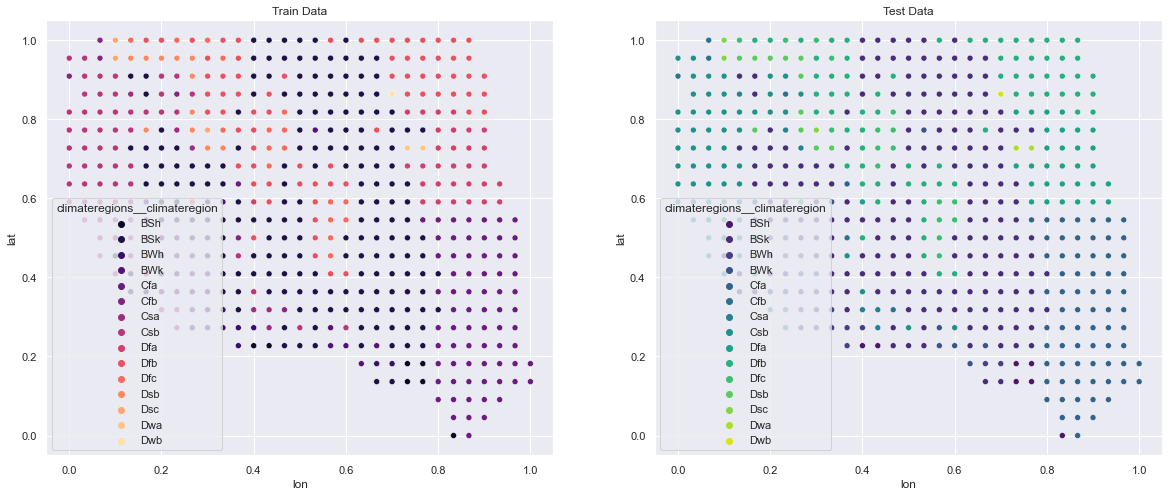

In [36]:
# Set up figures
fig, ax = plt.subplots(1,2, figsize=(20,8))
# Draw scatterplots
sns.scatterplot(data=dp_by_region_train, y='lat', x='lon', hue='climateregions__climateregion', palette='magma', ax=ax[0])
sns.scatterplot(data=dp_by_region_test, y='lat', x='lon', hue='climateregions__climateregion', palette='viridis', ax=ax[1])
# Add descriptions
ax[0].set_title('Train Data')
ax[1].set_title('Test Data')
# Display plots
plt.show()

Let's check whether we have the same locations in training and tesing sets, or some of them differ. To do that we are going to combine both datasets and group their latitudes and longitudes to understand how many such combinations we have and how many data points each of them has in result.  

In [37]:
# Concatenate train and test data
concat_set = pd.concat([train_data, test_data], axis=0).groupby(['lat', 'lon']).size().to_frame('data_points_count').reset_index(drop=False)
concat_set

,lat,lon,data_points_count
0,0.000000,0.833333,792
1,0.000000,0.866667,792
2,0.045455,0.833333,792
3,0.045455,0.866667,792
4,0.045455,0.900000,792
...,...,...,...
570,1.000000,0.733333,792
571,1.000000,0.766667,792
572,1.000000,0.800000,792
573,1.000000,0.833333,792


Result: 
- It seems that the number of locations has increased from 514 to 575, but it is a bit odd. In most cases the latitude from training set had the identical latitude from testing set and the same goes for longitude. 
- Number of data points for each combination of longitude and latitude has increased and became 792 (731 + 61), which means in most cases a batch of data points from testing was added to the batch of training.

Let's check how unmached latitudes and longitudes look like. We can do that by filtering out combinations that have the initial 731 data point and 61. 

In [38]:
unm_731 = concat_set[concat_set.data_points_count == 731][:5]
unm_731


,lat,lon,data_points_count
33,0.227273,0.366667,731
34,0.227273,0.400000,731
35,0.227273,0.433333,731
36,0.227273,0.466667,731
37,0.227273,0.500000,731


In [39]:
unm_61 = concat_set[concat_set.data_points_count == 61][:5]
unm_61

,lat,lon,data_points_count
52,0.227273,0.366667,61
53,0.227273,0.400000,61
54,0.227273,0.433333,61
55,0.227273,0.466667,61
56,0.227273,0.500000,61


Result: the stange thing is that latitude and longitude value pairs look identical for both datasets. Yet they do not match. 

Let's check whether the machine considers them the same. 

In [40]:
print('Are latitude values the same for 5 rows from unm_731 and unm_61?', unm_731.lat.equals(unm_61.lat)) 
print('Are longitudes the same?', unm_731.lon.equals(unm_61.lon))

Are latitude values the same for 5 rows from unm_731 and unm_61? False
Are longitudes the same? False


Result: the machine do not consider them the same, which means that the values are different in the initial `csv` file, yet are troncated and shown here like the same. 

We could probably troncate the values to 6 decimal places, because according to the wiki page it will give us essentially the same location (https://wiki.openstreetmap.org/wiki/Precision_of_coordinates).

In [43]:
train_data.lat = train_data.lat.round(6)
train_data.lon = train_data.lon.round(6)
test_data.lat = test_data.lat.round(6)
test_data.lon = test_data.lon.round(6)
train_data.head(3)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [42]:
pd.concat([train_data, test_data], axis=0).groupby(['lat', 'lon']).size()

lat       lon     
0.000000  0.833333    792
          0.866667    792
0.045455  0.833333    792
          0.866667    792
          0.900000    792
                     ... 
1.000000  0.733333    792
          0.766667    792
          0.800000    792
          0.833333    792
          0.866667    792
Length: 514, dtype: int64

TBC.